In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random,os
import cv2
from keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Input,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils import get_file
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os

base_path = "/content/drive/MyDrive/Project /Intrenship/DataSets/Data"
print(os.listdir(base_path))


['features_30_sec.csv', 'features_3_sec.csv', 'genres_original', 'images_original']


In [7]:
import pandas as pd

csv_30s = pd.read_csv(os.path.join(base_path, "features_30_sec.csv"))
csv_3s  = pd.read_csv(os.path.join(base_path, "features_3_sec.csv"))



In [8]:
csv_30s.shape

(1000, 60)

In [9]:
csv_3s.shape

(9990, 60)

/tmp/ipython-input-2109641826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=csv_30s, x="label", order=csv_30s["label"].value_counts().index, palette="viridis")


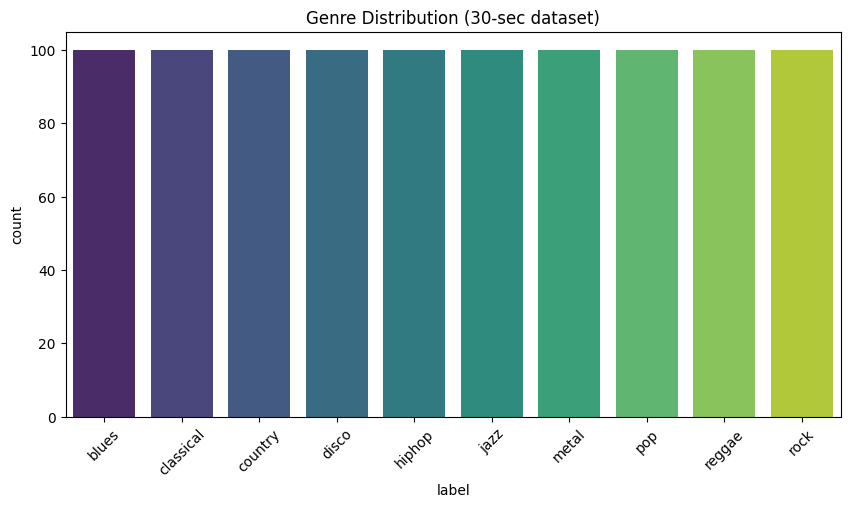

In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Genre distribution
plt.figure(figsize=(10,5))
sns.countplot(data=csv_30s, x="label", order=csv_30s["label"].value_counts().index, palette="viridis")
plt.title("Genre Distribution (30-sec dataset)")
plt.xticks(rotation=45)
plt.show()

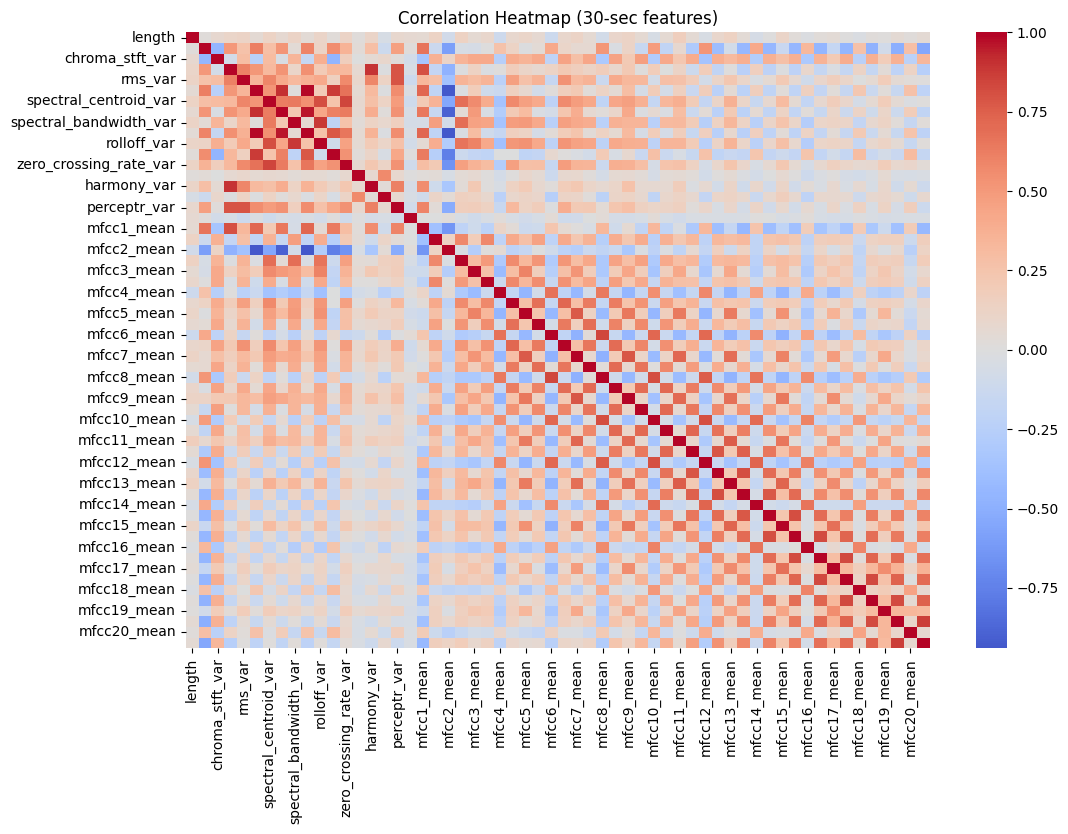

In [11]:
# 3. Correlation heatmap of audio features (30-sec)
plt.figure(figsize=(12,8))
sns.heatmap(csv_30s.drop(columns=["filename","label"]).corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (30-sec features)")
plt.show()

/tmp/ipython-input-3905576585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv_30s, x="label", y="spectral_centroid_mean", palette="Set2")


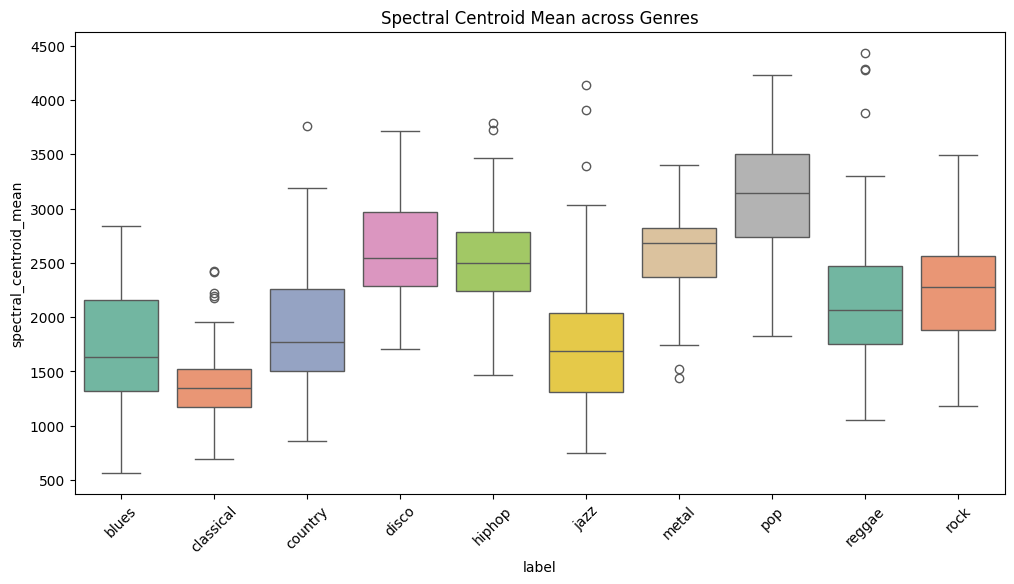

In [12]:
# 4. Boxplot of one feature (e.g., spectral_centroid_mean) across genres
plt.figure(figsize=(12,6))
sns.boxplot(data=csv_30s, x="label", y="spectral_centroid_mean", palette="Set2")
plt.title("Spectral Centroid Mean across Genres")
plt.xticks(rotation=45)
plt.show()

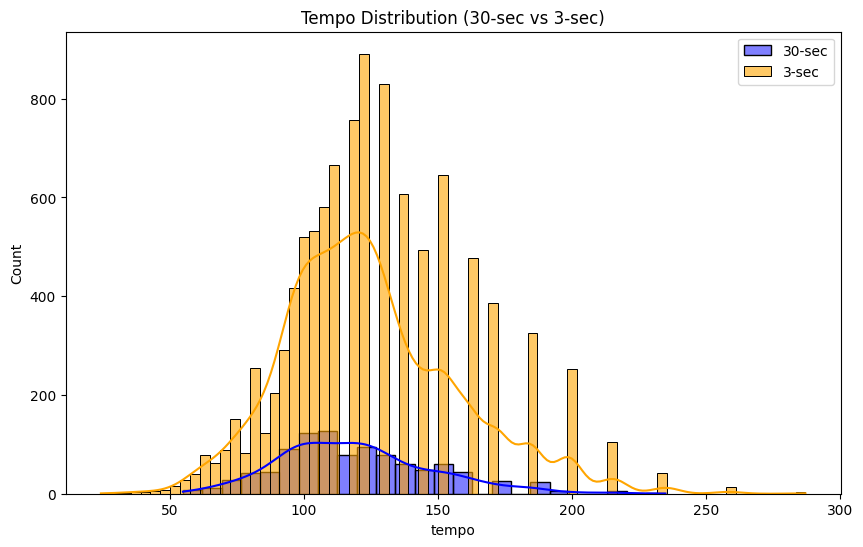

In [13]:
# 5. Compare feature distributions between 30-sec and 3-sec datasets
plt.figure(figsize=(10,6))
sns.histplot(csv_30s["tempo"], kde=True, color="blue", label="30-sec")
sns.histplot(csv_3s["tempo"], kde=True, color="orange", label="3-sec", alpha=0.6)
plt.title("Tempo Distribution (30-sec vs 3-sec)")
plt.legend()
plt.show()

In [14]:
import librosa

audio_dir = os.path.join(base_path, "genres_original", "blues")  # example genre
audio_file = os.path.join(audio_dir, os.listdir(audio_dir)[0])

y, sr = librosa.load(audio_file, sr=22050)
print("Audio shape:", y.shape, "Sample rate:", sr)

Audio shape: (661794,) Sample rate: 22050


Audio shape: (661794,) Sample rate: 22050


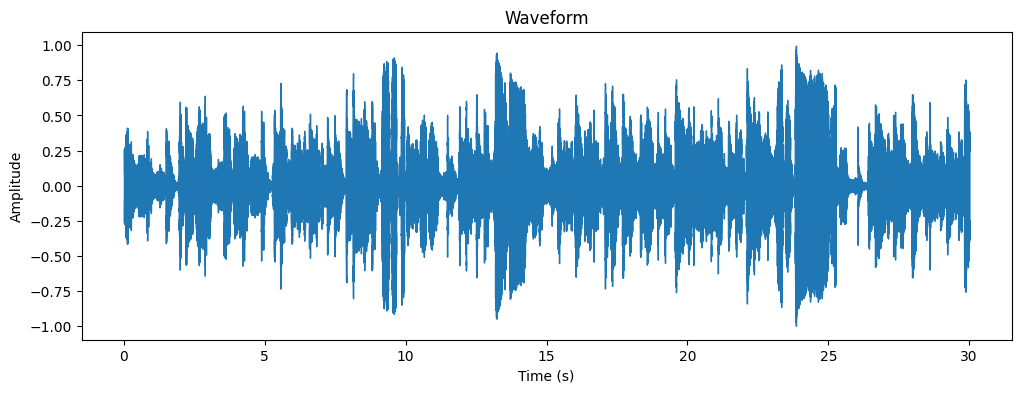

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Example audio file
audio_dir = os.path.join(base_path, "genres_original", "blues")
audio_file = os.path.join(audio_dir, os.listdir(audio_dir)[0])

y, sr = librosa.load(audio_file, sr=22050)
print("Audio shape:", y.shape, "Sample rate:", sr)

# 1. Waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

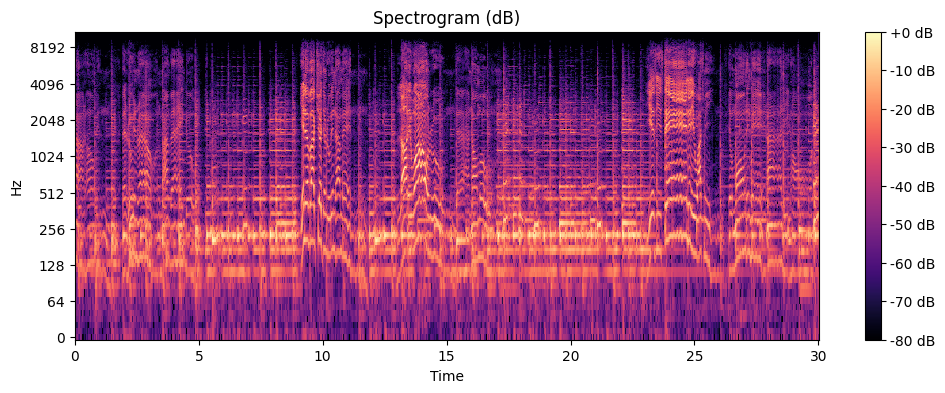

In [16]:
# 2. Spectrogram (STFT)
D = np.abs(librosa.stft(y))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         sr=sr, x_axis="time", y_axis="log", cmap="magma")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()

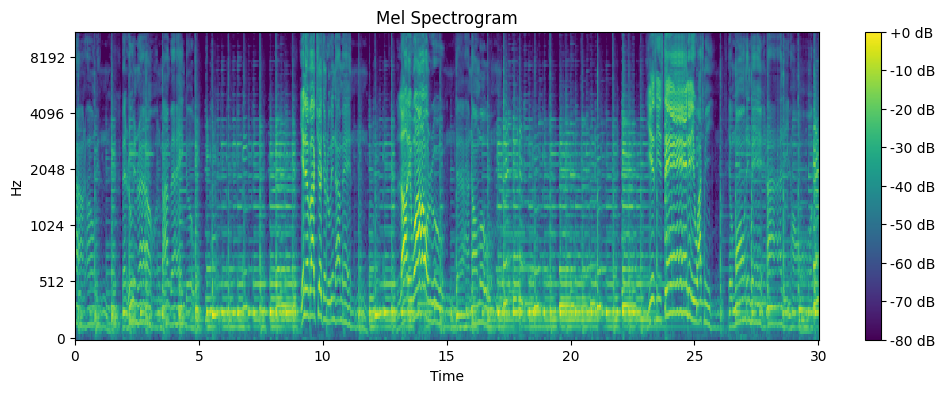

In [17]:
# 3. Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel", cmap="viridis")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()

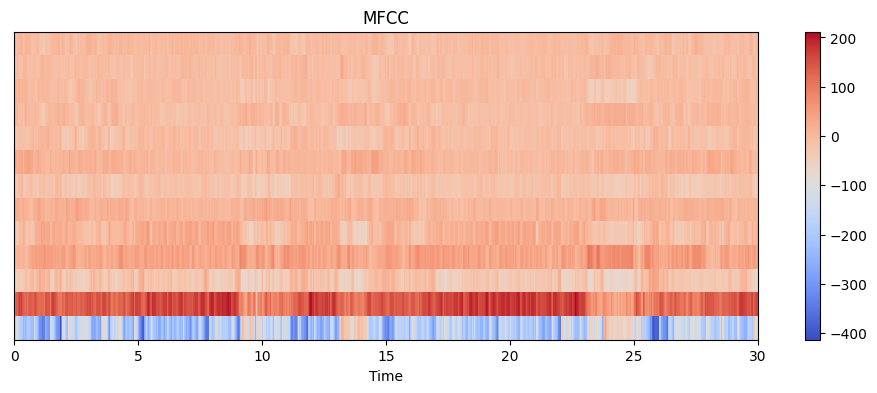

In [18]:
# 4. MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr, cmap="coolwarm")
plt.colorbar()
plt.title("MFCC")
plt.show()

In [19]:
from PIL import Image

img_dir = os.path.join(base_path, "images_original", "blues")  # example genre
img_file = os.path.join(img_dir, os.listdir(img_dir)[0])

img = Image.open(img_file)
img.show()

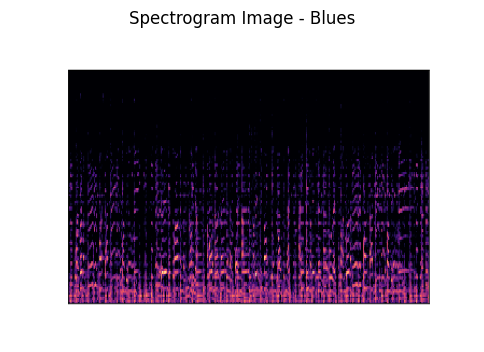

In [20]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Example image path
img_dir = os.path.join(base_path, "images_original", "blues")
img_file = os.path.join(img_dir, os.listdir(img_dir)[0])

# Open image
img = Image.open(img_file)

# Show using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Spectrogram Image - Blues")
plt.show()

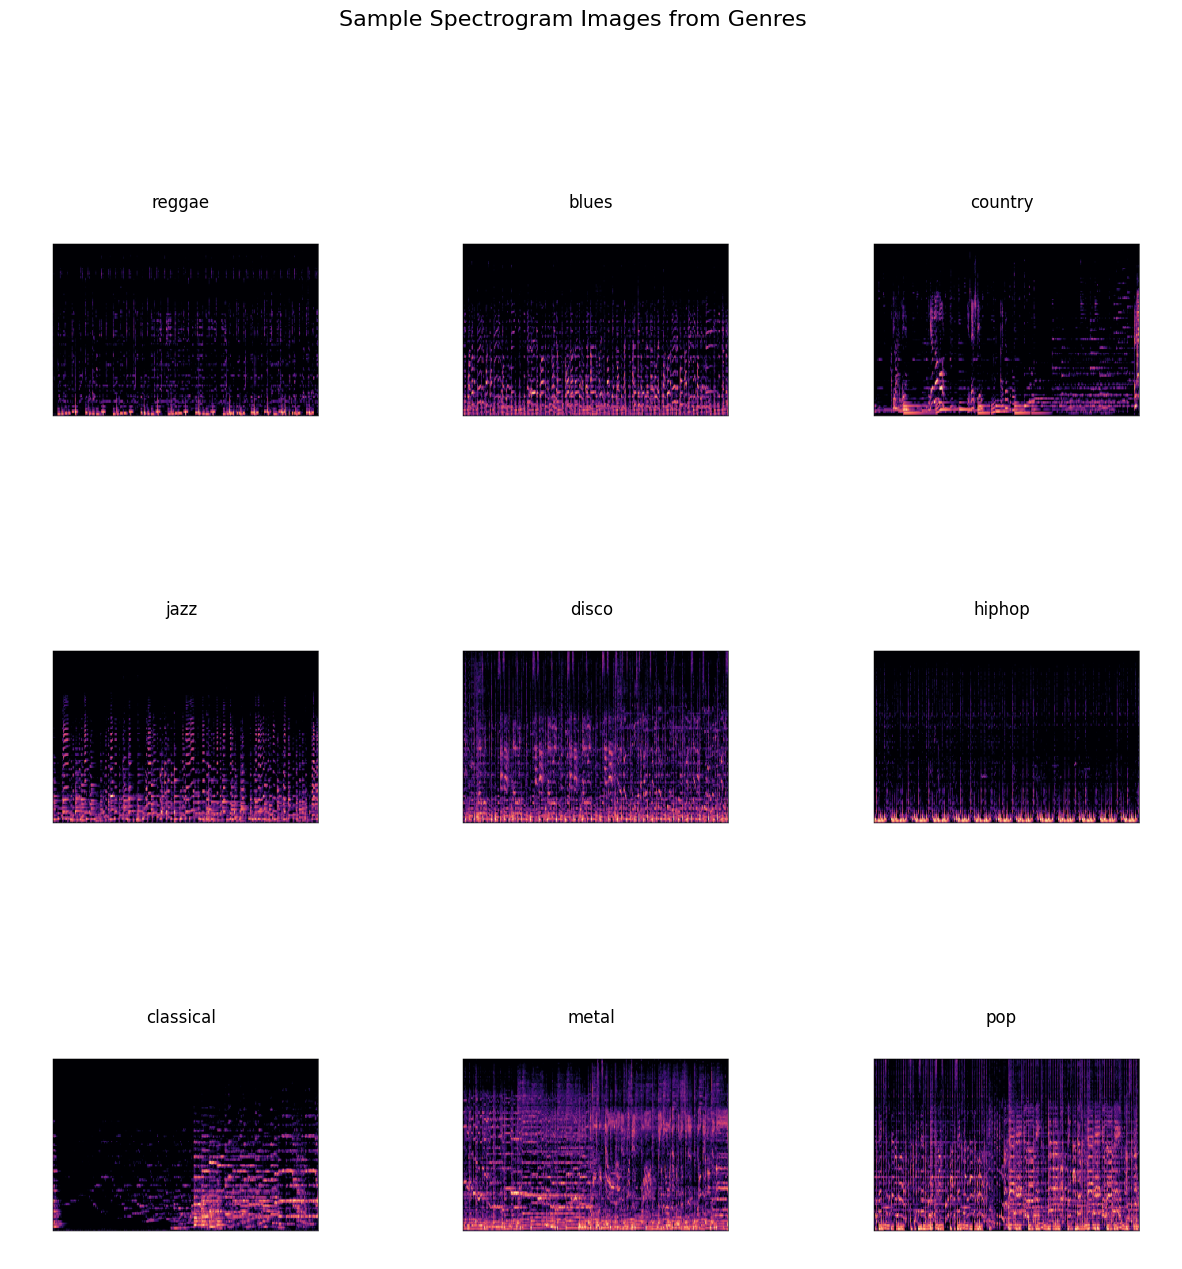

In [21]:
genres = os.listdir(os.path.join(base_path, "images_original"))

plt.figure(figsize=(15, 15))
for i, genre in enumerate(genres[:9]):  # first 9 genres
    img_dir = os.path.join(base_path, "images_original", genre)
    img_file = os.path.join(img_dir, os.listdir(img_dir)[0])
    img = Image.open(img_file)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(genre)

plt.suptitle("Sample Spectrogram Images from Genres", fontsize=16)
plt.show()

## 2. Tabular Approach (Using CSV Features)

2.1 Load features

In [22]:
import pandas as pd

df = pd.read_csv(base_path + "/features_3_sec.csv")   # more samples than 30s
print(df.head())
print(df['label'].value_counts())


            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.05

## 2.2 Split Data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df.drop(columns=['filename','label'])
y = df['label']

le = LabelEncoder()
y_enc = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, stratify=y_enc, test_size=0.2, random_state=42)

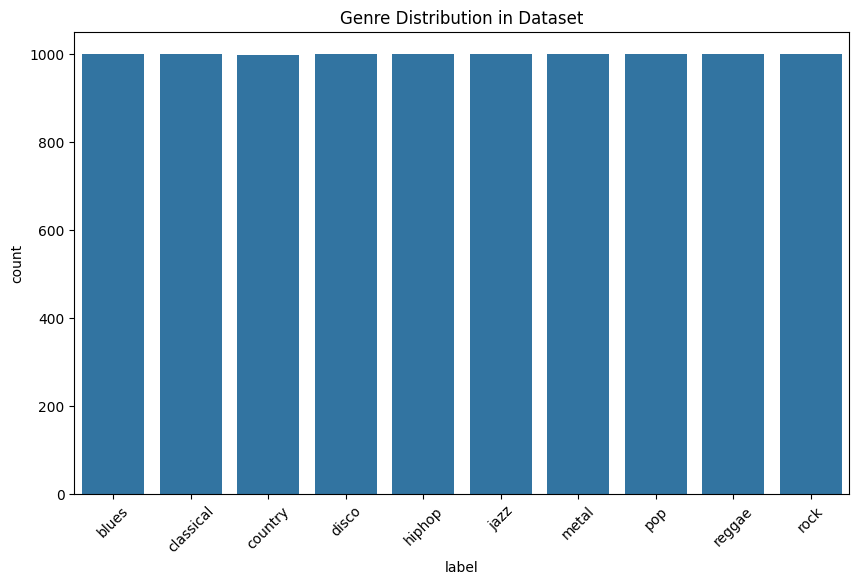

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x=df['label'], order=sorted(df['label'].unique()))
plt.xticks(rotation=45)
plt.title("Genre Distribution in Dataset")
plt.show()

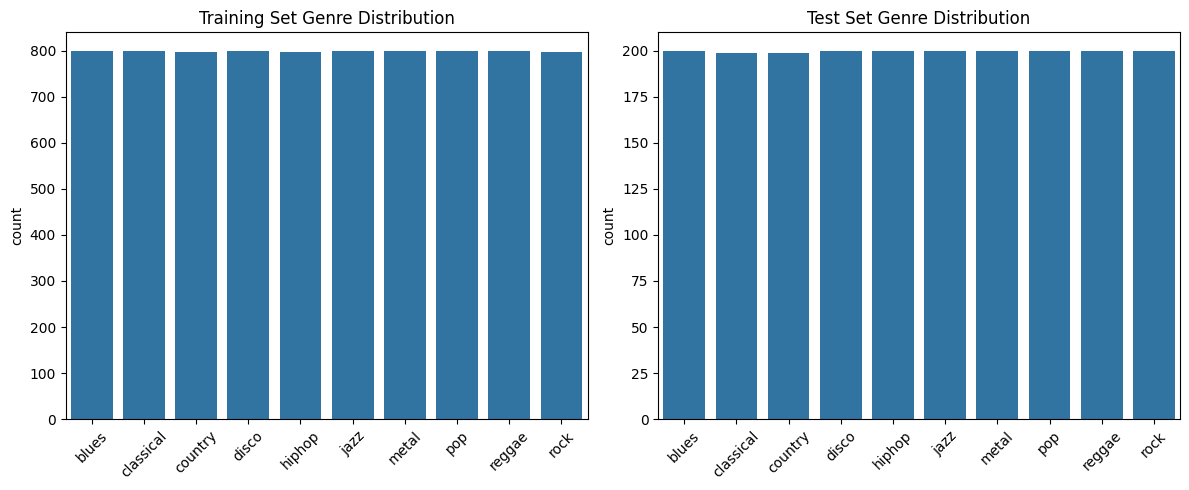

In [25]:
import numpy as np

plt.figure(figsize=(12,5))

# Train
plt.subplot(1,2,1)
sns.countplot(x=le.inverse_transform(y_train), order=sorted(le.classes_))
plt.xticks(rotation=45)
plt.title("Training Set Genre Distribution")

# Test
plt.subplot(1,2,2)
sns.countplot(x=le.inverse_transform(y_test), order=sorted(le.classes_))
plt.xticks(rotation=45)
plt.title("Test Set Genre Distribution")

plt.tight_layout()
plt.show()

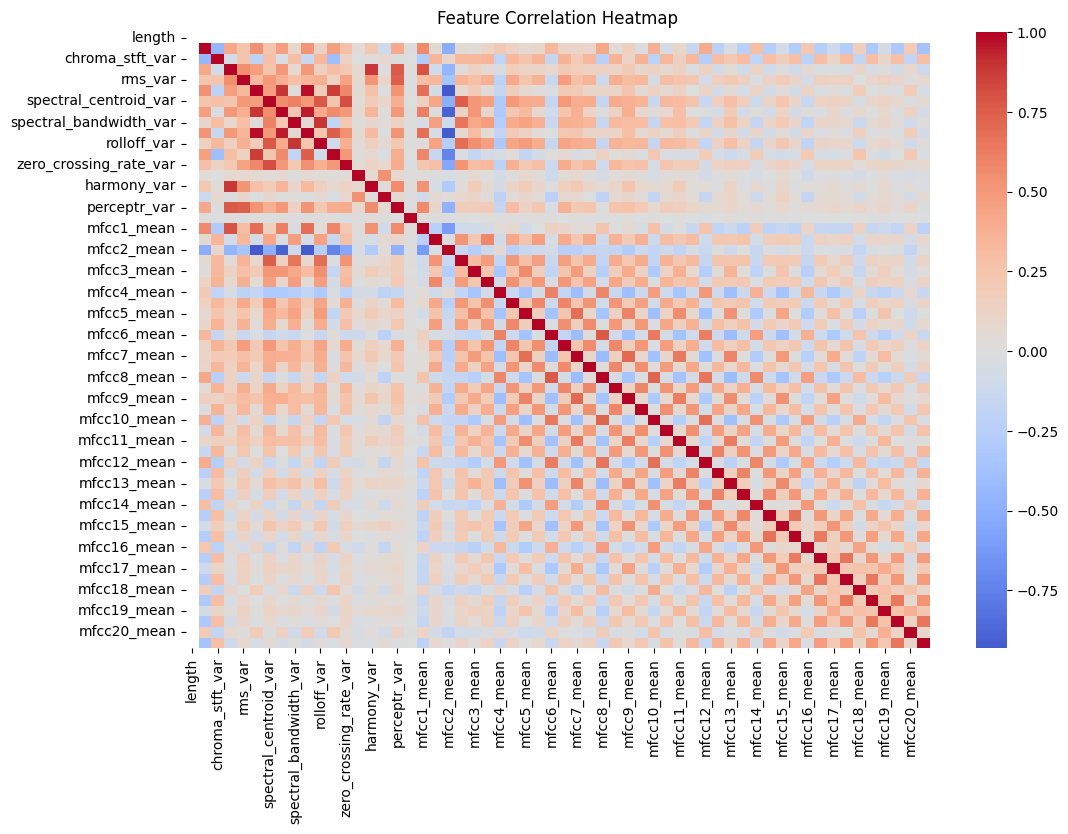

In [26]:
plt.figure(figsize=(12,8))
corr = pd.DataFrame(X_scaled, columns=X.columns).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

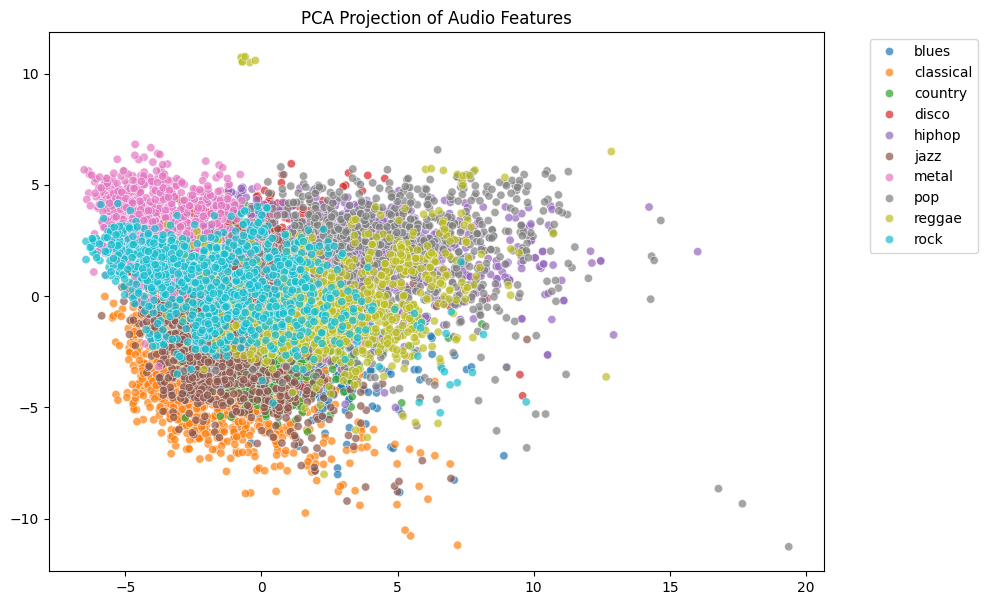

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=le.inverse_transform(y_enc), palette="tab10", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA Projection of Audio Features")
plt.show()

## 2.3 Train a Model (RandomForest + MLP)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       blues       0.86      0.87      0.87       200
   classical       0.91      0.96      0.93       199
     country       0.80      0.83      0.82       199
       disco       0.82      0.84      0.83       200
      hiphop       0.92      0.89      0.91       200
        jazz       0.85      0.90      0.87       200
       metal       0.87      0.94      0.90       200
         pop       0.97      0.82      0.89       200
      reggae       0.83      0.89      0.86       200
        rock       0.88      0.72      0.79       200

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998



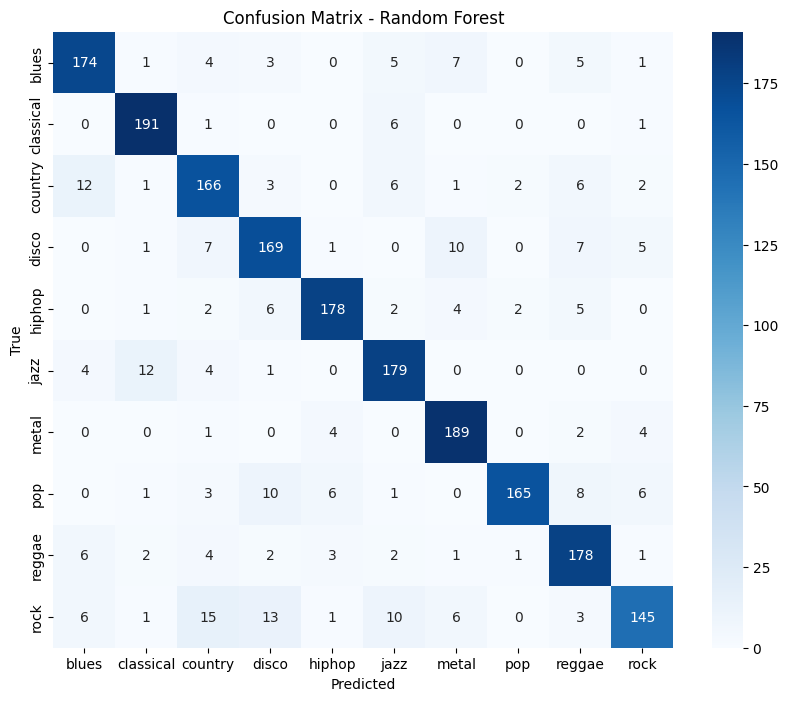

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest")
plt.show()

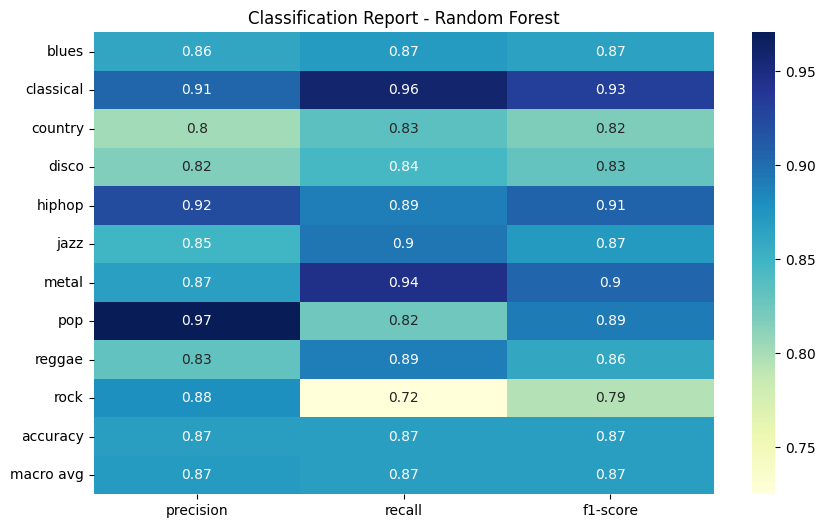

In [30]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report - Random Forest")
plt.show()

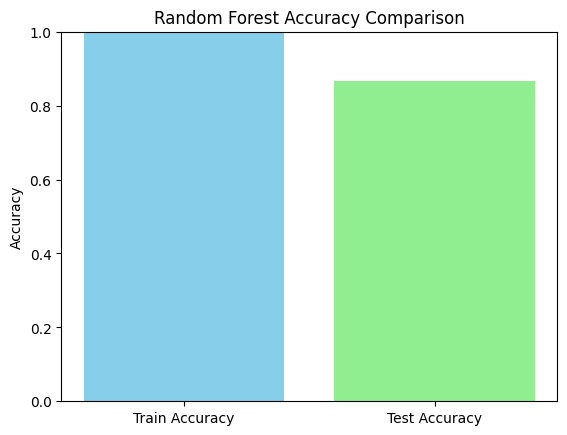

In [31]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc  = accuracy_score(y_test, y_pred)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["skyblue", "lightgreen"])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy Comparison")
plt.show()


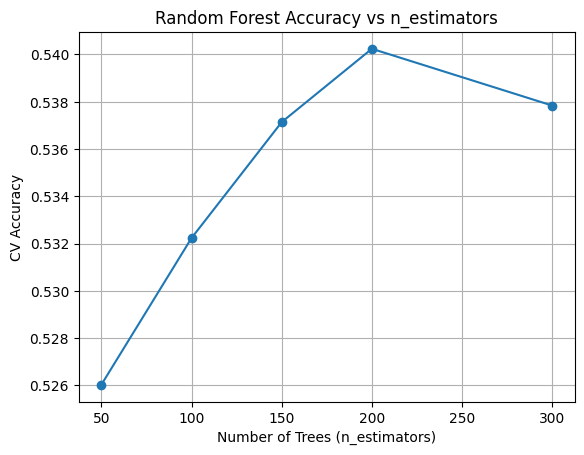

In [32]:
from sklearn.model_selection import cross_val_score
import numpy as np

estimators = [50, 100, 150, 200, 300]
cv_scores = []

for est in estimators:
    rf = RandomForestClassifier(n_estimators=est, random_state=42)
    scores = cross_val_score(rf, X_scaled, y_enc, cv=5, scoring="accuracy")
    cv_scores.append(np.mean(scores))

plt.plot(estimators, cv_scores, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("CV Accuracy")
plt.title("Random Forest Accuracy vs n_estimators")
plt.grid(True)
plt.show()


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = len(le.classes_)
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4112 - loss: 1.6587 - val_accuracy: 0.7100 - val_loss: 0.9209
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6409 - loss: 1.0332 - val_accuracy: 0.7475 - val_loss: 0.7818
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7028 - loss: 0.8448 - val_accuracy: 0.7725 - val_loss: 0.6844
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7420 - loss: 0.7364 - val_accuracy: 0.7975 - val_loss: 0.6032
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7598 - loss: 0.7066 - val_accuracy: 0.8100 - val_loss: 0.5531
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7874 - loss: 0.6208 - val_accuracy: 0.8225 - val_loss: 0.5217
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7972 - loss: 0.5941 - val_accuracy: 0.8400 - val_loss: 0.4850
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8029 - loss: 0.5618 - val_accuracy: 0

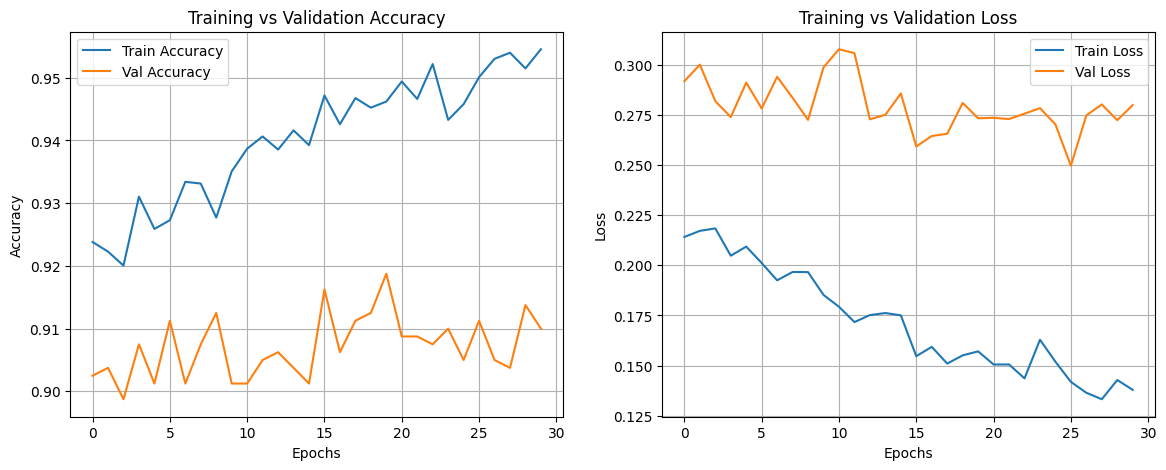

In [35]:

# --- Plotting ---
plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

plt.show()

## 3. Image-Based Approach (Spectrograms + CNN)

## 3.1 Image Data Generator

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = base_path + "/images_original"
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    train_dir, target_size=(128,128), batch_size=32,
    class_mode='sparse', subset='training')

val_gen = datagen.flow_from_directory(
    train_dir, target_size=(128,128), batch_size=32,
    class_mode='sparse', subset='validation')


Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


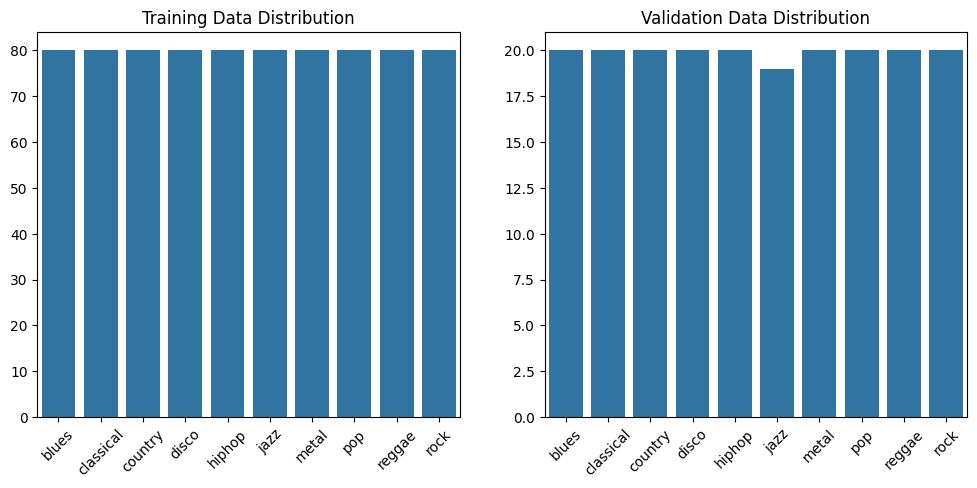

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Training data class distribution
train_counts = np.bincount(train_gen.classes)
val_counts   = np.bincount(val_gen.classes)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=list(train_gen.class_indices.keys()), y=train_counts)
plt.xticks(rotation=45)
plt.title("Training Data Distribution")

plt.subplot(1,2,2)
sns.barplot(x=list(val_gen.class_indices.keys()), y=val_counts)
plt.xticks(rotation=45)
plt.title("Validation Data Distribution")

plt.show()

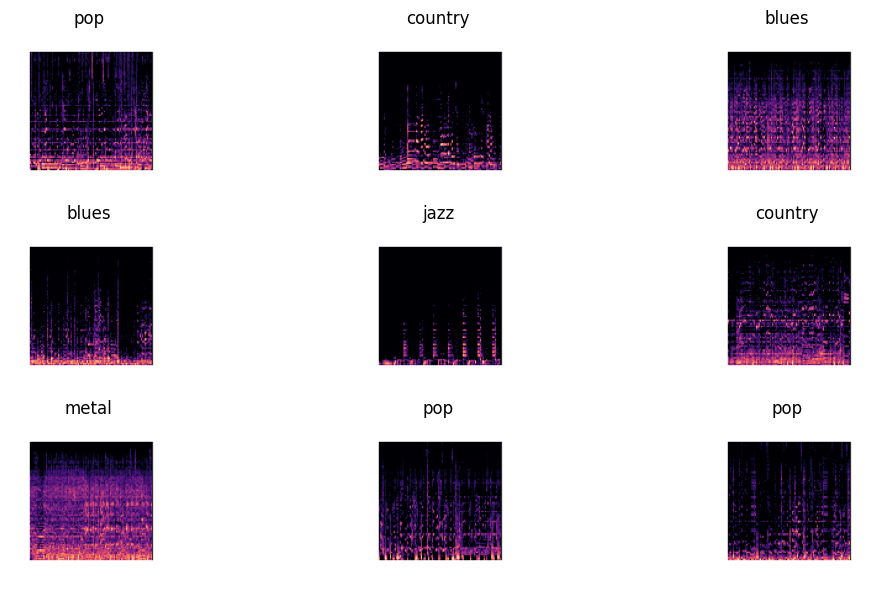

In [38]:
# Show some sample images from training generator
images, labels = next(train_gen)

plt.figure(figsize=(12,6))
for i in range(9):  # 9 sample images
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(list(train_gen.class_indices.keys())[int(labels[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

## 3.2 CNN Model

In [39]:
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(train_gen, validation_data=val_gen, epochs=20)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 731s 29s/step - accuracy: 0.1279 - loss: 2.3162 - val_accuracy: 0.2864 - val_loss: 2.2330
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.2484 - loss: 2.1613 - val_accuracy: 0.3317 - val_loss: 1.9436
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.3702 - loss: 1.7443 - val_accuracy: 0.3920 - val_loss: 1.7569
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.4475 - loss: 1.5582 - val_accuracy: 0.4271 - val_loss: 1.6815
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.4770 - loss: 1.3959 - val_accuracy: 0.3769 - val_loss: 1.7739
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.5570 - loss: 1.2181 - val_accuracy: 0.5226 - val_loss: 1.6116
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.6300 - loss: 1.0351 - val_accuracy: 0.5427 - val_loss: 1.4227
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.7364 - loss: 0.8480 - val_accuracy: 0.

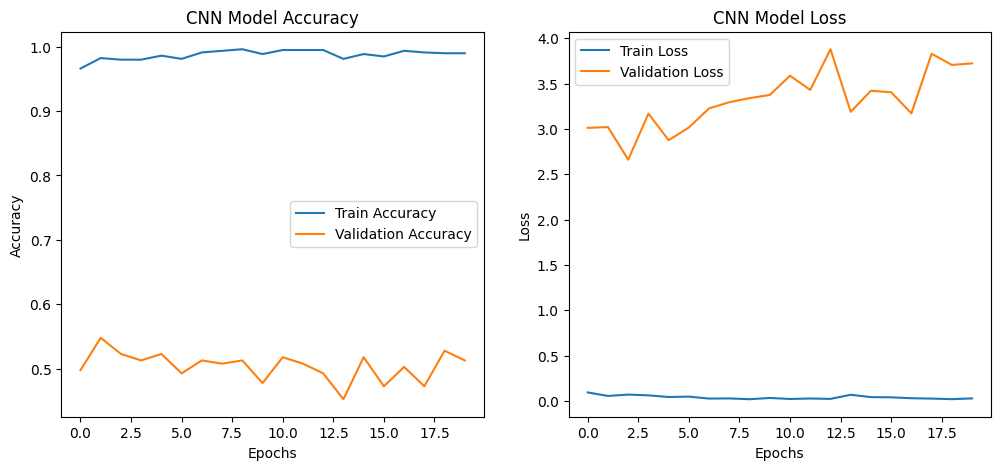

In [41]:
# Plot Accuracy and Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("CNN Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## 4. Transfer Learning (Bonus)

In [42]:
from tensorflow.keras.applications import MobileNetV2

base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base.trainable = False

inp = layers.Input(shape=(128,128,3))
x = base(inp, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
out = layers.Dense(train_gen.num_classes, activation='softmax')(x)

tl_model = models.Model(inp, out)
tl_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tl_model.fit(train_gen, validation_data=val_gen, epochs=20)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 881ms/step - accuracy: 0.1697 - loss: 2.5975 - val_accuracy: 0.3668 - val_loss: 1.8359
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.3247 - loss: 1.8769 - val_accuracy: 0.3920 - val_loss: 1.6194
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.4053 - loss: 1.7068 - val_accuracy: 0.4623 - val_loss: 1.5640
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.4840 - loss: 1.4993 - val_accuracy: 0.4372 - val_loss: 1.5039
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.5176 - loss: 1.3558 - val_accuracy: 0.4824 - val_loss: 1.5071
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.5645 - loss: 1.3201 - val_accuracy: 0.5075 - val_loss: 1.4254
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - accuracy: 0.5897 - loss: 1.2538 - val_accuracy: 0.4623 - val_loss: 1.4682
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step -

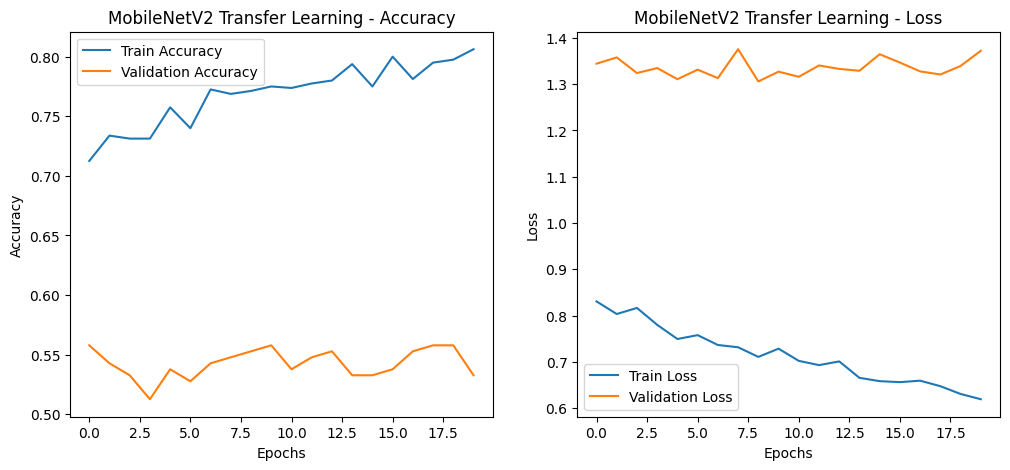

In [45]:
# Plot Accuracy and Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title("MobileNetV2 Transfer Learning - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title("MobileNetV2 Transfer Learning - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()
